# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pingouin as pg
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#attributes = [''['main']['temp']','['main']['humidity']','['clouds']['all']','['wind']['speed']','['sys']['country']','['dt']','['coord']['lon']','['coord']['lat']']

In [8]:
maxtemp = []
temp = []
humid = []
cloud = []
wind = []
country = []
date = []
lon = []
lat = []
cityname = []
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        maxtemp.append(response['main']['temp_max'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        cityname.append(city)
        print(f"{city} data found {city} index value is {cities.index(city)}")
    except KeyError:
        print(f"ERR {city} data missing")
        pass

fortuna data found fortuna index value is 0
rikitea data found rikitea index value is 1
albany data found albany index value is 2
mataura data found mataura index value is 3
georgetown data found georgetown index value is 4
rundu data found rundu index value is 5
qaanaaq data found qaanaaq index value is 6
punta arenas data found punta arenas index value is 7
vaini data found vaini index value is 8
mahebourg data found mahebourg index value is 9
hermanus data found hermanus index value is 10
tonota data found tonota index value is 11
port hardy data found port hardy index value is 12
atuona data found atuona index value is 13
bluff data found bluff index value is 14
sur data found sur index value is 15
cabo san lucas data found cabo san lucas index value is 16
dingle data found dingle index value is 17
dikson data found dikson index value is 18
tuatapere data found tuatapere index value is 19
kapaa data found kapaa index value is 20
kodiak data found kodiak index value is 21
hasaki dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
df = pd.DataFrame(list(zip(maxtemp, temp, humid, cloud, wind, country, date, lon, lat, cityname)),columns =['maxtemp', 
'temp', 
'humid', 
'cloud', 
'wind', 
'country', 
'date', 
'lon', 
'lat', 
'cityname'])

In [10]:
df.to_csv('../outputs/CityWeather.csv')

In [11]:
df.head(10)

,maxtemp,temp,humid,cloud,wind,country,date,lon,lat,cityname
0,12.78,12.34,87,1,6.69,US,1618687670,-124.1573,40.5982,fortuna
1,25.05,25.05,68,100,3.96,PF,1618687558,-134.9692,-23.1203,rikitea
2,10.56,10.00,54,100,3.07,US,1618687671,-73.9662,42.6001,albany
3,10.56,10.56,93,100,3.13,NZ,1618687671,168.8643,-46.1927,mataura
4,27.78,26.85,89,20,1.54,MY,1618687671,100.3354,5.4112,georgetown
5,19.73,19.73,42,62,2.49,NA,1618687636,19.7667,-17.9333,rundu
6,-18.59,-18.59,92,100,0.69,GL,1618687672,-69.3632,77.4840,qaanaaq
7,13.00,12.89,50,75,4.12,CL,1618687480,-70.9167,-53.1500,punta arenas
8,21.00,21.00,88,20,2.06,TO,1618687672,-175.2000,-21.2000,vaini
9,25.00,25.00,94,75,2.11,MU,1618687672,57.7000,-20.4081,mahebourg


In [12]:
df.describe()

,maxtemp,temp,humid,cloud,wind,date,lon,lat
count,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02,547.000000,547.000000
mean,15.988995,15.750457,67.725777,56.080439,3.607495,1.618688e+09,15.798183,19.542107
std,12.384205,12.386711,22.448511,39.469803,2.428343,7.783197e+01,90.034133,32.882084
min,-30.000000,-30.000000,1.000000,0.000000,0.360000,1.618687e+09,-175.200000,-54.800000
25%,9.000000,8.370000,54.000000,18.500000,1.970000,1.618688e+09,-61.955350,-8.016000
50%,18.330000,18.000000,72.000000,71.000000,3.090000,1.618688e+09,20.252100,22.146100
75%,26.000000,25.605000,86.000000,99.000000,4.695000,1.618688e+09,97.322950,44.270600
max,39.440000,39.000000,100.000000,100.000000,15.290000,1.618688e+09,179.316700,78.218600


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
df_clean = df.loc[df['humid'] <= 100,:]

In [14]:
df_clean.describe()

,maxtemp,temp,humid,cloud,wind,date,lon,lat
count,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02,547.000000,547.000000
mean,15.988995,15.750457,67.725777,56.080439,3.607495,1.618688e+09,15.798183,19.542107
std,12.384205,12.386711,22.448511,39.469803,2.428343,7.783197e+01,90.034133,32.882084
min,-30.000000,-30.000000,1.000000,0.000000,0.360000,1.618687e+09,-175.200000,-54.800000
25%,9.000000,8.370000,54.000000,18.500000,1.970000,1.618688e+09,-61.955350,-8.016000
50%,18.330000,18.000000,72.000000,71.000000,3.090000,1.618688e+09,20.252100,22.146100
75%,26.000000,25.605000,86.000000,99.000000,4.695000,1.618688e+09,97.322950,44.270600
max,39.440000,39.000000,100.000000,100.000000,15.290000,1.618688e+09,179.316700,78.218600


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [17]:
df_clean.head()

,maxtemp,temp,humid,cloud,wind,country,date,lon,lat,cityname
0,12.78,12.34,87,1,6.69,US,1618687670,-124.1573,40.5982,fortuna
1,25.05,25.05,68,100,3.96,PF,1618687558,-134.9692,-23.1203,rikitea
2,10.56,10.00,54,100,3.07,US,1618687671,-73.9662,42.6001,albany
3,10.56,10.56,93,100,3.13,NZ,1618687671,168.8643,-46.1927,mataura
4,27.78,26.85,89,20,1.54,MY,1618687671,100.3354,5.4112,georgetown


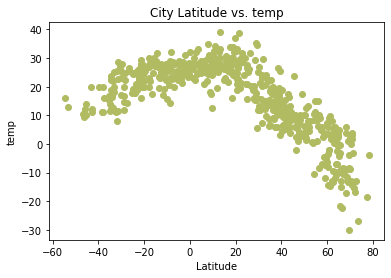

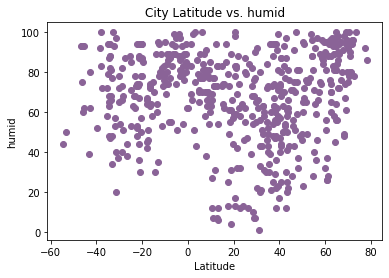

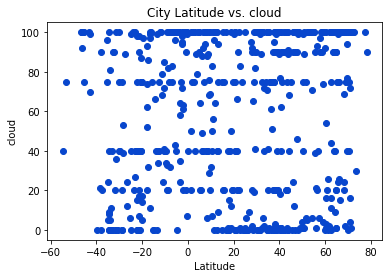

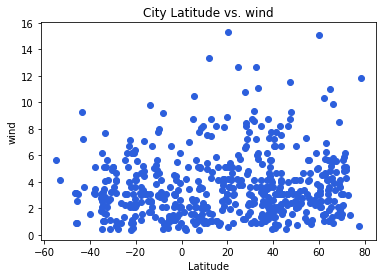

In [18]:
attribute = ['temp','humid','cloud','wind']
for column in df_clean.columns:
    if column in attribute:
        rgb = np.random.rand(3,)
        plt.scatter(df_clean['lat'],df_clean[column],c=[rgb])
        plt.title(f"City Latitude vs. {column}")
        plt.xlabel('Latitude')
        plt.ylabel(column)
        plt.savefig(f"../outputs/{column}_Lat.png", transparent=True)
        plt.show()
        

## Linear Regression

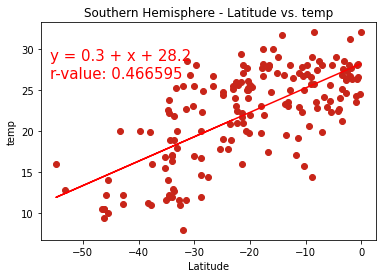

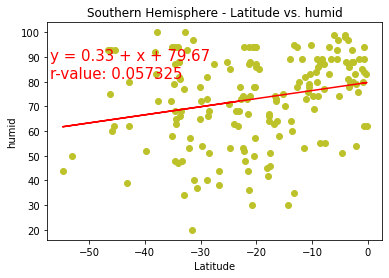

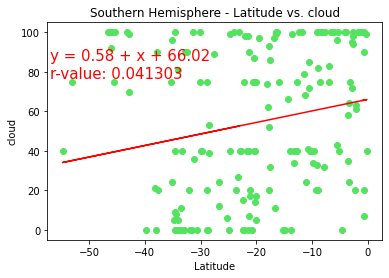

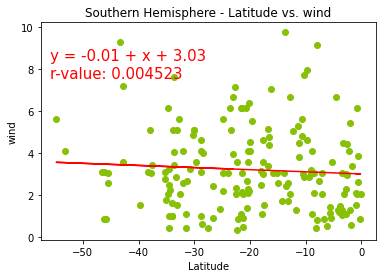

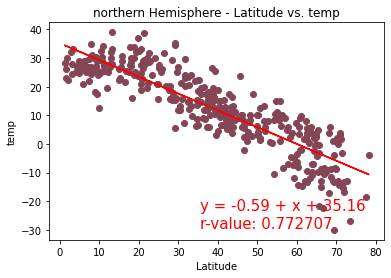

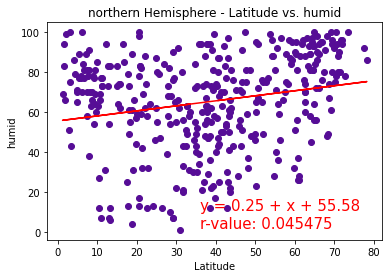

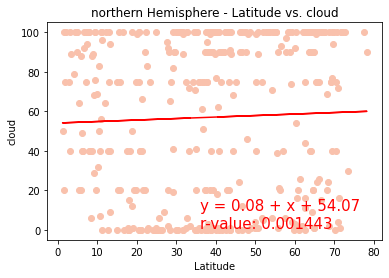

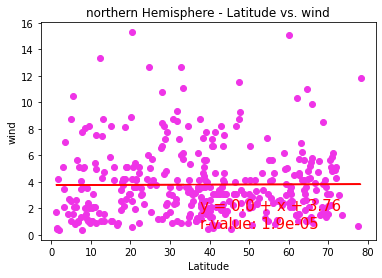

In [97]:
attribute = ['temp','humid','cloud','wind']
for column in df_clean.columns:
    if column in attribute:
        rgb = np.random.rand(3,)
        southern_hemisphere = df_clean.loc[df_clean['lat'] <= 0,['lat',column]]
        plt.scatter(southern_hemisphere['lat'],southern_hemisphere[column],c=[rgb])
        lm = pg.linear_regression(southern_hemisphere['lat'],southern_hemisphere[column])
        m = lm['coef'][1]
        b = lm['coef'][0]
        reg_val = southern_hemisphere['lat'] * m + b
        r = lm['r2'][1]
        line_eq = f"y = {str(round(m,2))} + x + {str(round(b,2))}\nr-value: {str(round(r,6))}"
        plt.plot(southern_hemisphere['lat'],reg_val,"r-")
        plt.title(f"Southern Hemisphere - Latitude vs. {column}")
        plt.xlabel('Latitude')
        plt.ylabel(column)
        plt.annotate(line_eq,(50,200),xycoords="figure points",fontsize=15,color='red');
        plt.savefig(f"../outputs/{column}_SouthernHem.png", transparent=True)
        plt.show()
attribute = ['temp','humid','cloud','wind']
for column in df_clean.columns:
    if column in attribute:
        rgb = np.random.rand(3,)
        northern_hemisphere = df_clean.loc[df_clean['lat'] >= 0,['lat',column]]
        plt.scatter(northern_hemisphere['lat'],northern_hemisphere[column],c=[rgb])
        lm = pg.linear_regression(northern_hemisphere['lat'],northern_hemisphere[column])
        m = lm['coef'][1]
        b = lm['coef'][0]
        reg_val = northern_hemisphere['lat'] * m + b
        r = lm['r2'][1]
        line_eq = f"y = {str(round(m,2))} + x + {str(round(b,2))}\nr-value: {str(round(r,6))}"
        plt.plot(northern_hemisphere['lat'],reg_val,"r-")
        plt.title(f"northern Hemisphere - Latitude vs. {column}")
        plt.xlabel('Latitude')
        plt.ylabel(column)
        plt.annotate(line_eq,(200,50),xycoords="figure points",fontsize=15,color='red');
        plt.savefig(f"../outputs/{column}_NorthernHem.png", transparent=True)
        plt.show()       